<a href="https://colab.research.google.com/github/ZijingCaoo/sound_analysis/blob/main/statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieve Sounds from Textual Tags

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=9c1d3a1441d6809ddeadf1561c63fbc754db6e5f09b76502c1283967ae63d327
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [9]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is named 'your_file.csv'
file_name = list(uploaded.keys())[0]

# Specify the separator (delimiter)
# separator = ';'

# Load the CSV file into a Pandas DataFrame
# df = pd.read_csv(file_name,sep=separator)
df = pd.read_excel(file_name)
# print(df['category'])
# Exclude rows where the 'category' column is 0
df = df[df['category'] != 0]

# Display the filtered DataFrame
df.head()


Saving test.xlsx to test (2).xlsx


,query,id,name,category,note,previews,tags,lowlevel.spectral_complexity.min,lowlevel.spectral_complexity.max,lowlevel.spectral_complexity.dvar2,...,rhythm.second_peak_bpm.max,rhythm.second_peak_bpm.min,rhythm.second_peak_bpm.mean,rhythm.onset_rate,rhythm.beats_position,rhythm.first_peak_weight.max,rhythm.first_peak_weight.min,rhythm.first_peak_weight.mean,metadata.version.essentia,metadata.version.freesound_extractor
0,['incorrect'],700641,Incorrect Buzzer,1,Short notes <1s,https://cdn.freesound.org/previews/700/700641_...,"['wrong', 'failure', 'negative', 'buzzer', 'in...",0,38.999999,133.759960,...,0.0,0.0,0.0,3.250295,[],0.0,0.0,0.0,2.1-beta6-dev,0.3
1,['incorrect'],528956,Wrong Answer / Incorrect / Error,1,Short notes <1s,https://cdn.freesound.org/previews/528/528956_...,"['incorrect', 'loss', 'gameshow', 'failure', '...",0,14.999999,6.064213,...,0.0,0.0,0.0,2.871094,[],0.0,0.0,0.0,2.1-beta1,0.3
2,['incorrect'],514159,Distorted Beep Incorrect,1,Short notes <1s,https://cdn.freesound.org/previews/514/514159_...,"['incorrect', 'videogame', 'injury', 'confirma...",0,44.999998,120.862218,...,0.0,0.0,0.0,2.610085,[],0.0,0.0,0.0,2.1-beta6-dev,0.3
3,['incorrect'],181857,"Training Program, Incorrect2.aif",1,Short notes =1s,https://cdn.freesound.org/previews/181/181857_...,"['Incorrect', 'Training', 'SFX', 'Wrong', 'Pro...",0,8.000000,0.854518,...,0.0,0.0,0.0,0.978782,[],0.0,0.0,0.0,2.1-beta1,0.3
4,['incorrect'],181858,"Training Program, Incorrect1.aif",1,Short notes =2s,https://cdn.freesound.org/previews/181/181858_...,"['Incorrect', 'Training', 'SFX', 'Wrong', 'Pro...",0,8.000000,0.559218,...,0.0,0.0,0.0,1.957564,"[0.30185940861701904, 0.6037188172340391]",1.0,1.0,1.0,2.1-beta1,0.3


# 2D Visualization (UMAP)

In [10]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

# Exclude the 'id' column
df_filtered = df.drop(['metadata.version.essentia', 'note'], axis=1)

# Filter the DataFrame to columns with numeric types only
numeric_columns = df_filtered.select_dtypes(include='number')

# Exclude the specified columns with certain strings
exclude_columns = ['min', 'max', 'var', 'dvar', 'dmean', 'dvar2', 'dmean2']
filtered_columns = [col for col in numeric_columns.columns if not any(exclude in col for exclude in exclude_columns)]

# Include the 'query' column
X = df_filtered[['query'] + filtered_columns]

# Drop columns with NaN values
X = X.dropna(axis=1)

# Check if there are still samples in the dataset
if not X.empty:
    # Standardize the data
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X.iloc[:, 1:])  # Exclude the 'query' column for UMAP

    # Perform UMAP dimensionality reduction
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(X_standardized)

    # Create a DataFrame with the reduced dimensions and labels
    df_umap = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])
    df_umap['query'] = X['query']
    df_umap['sound_id'] = df['id']

    # Create interactive visualization with Plotly
    fig = px.scatter(df_umap, x='UMAP_1', y='UMAP_2', color='query', hover_name='sound_id',
                     title="Feature Space Visualization with UMAP",
                     labels={'UMAP_1': 'UMAP Dimension 1', 'UMAP_2': 'UMAP Dimension 2'},
                     color_discrete_sequence=px.colors.qualitative.Dark24)

    # Show the interactive plot
    fig.show()

else:
    print("No samples remaining after preprocessing.")


In [11]:
from IPython.display import Audio, display

def create_audio_player(sound_id):
    """
    Function to create an HTML audio player based on the sound ID.

    Parameters:
    sound_id (str): The sound ID to retrieve the URL from the 'df' DataFrame.
    """
    # Check if the sound ID exists in the DataFrame
    if sound_id in df['id'].values:
        url = df[df['id'] == sound_id]['previews'].iloc[0]  # Assuming 'previews' contains the URL
        display(Audio(url))
    else:
        print(f"No URL found for sound ID {sound_id}")

# Example usage:
sound_id = 619836
create_audio_player(sound_id)



No URL found for sound ID 619836


In [12]:
from scipy.stats import shapiro

# Exclude the first three columns
X_filtered = X.iloc[:, 3:]

# Calculate the total count of descriptors
total_descriptor_count = X_filtered.shape[1] - 3

# Group by the 'query' column
grouped_data = X_filtered.groupby(X['query'])

# Perform Shapiro-Wilk normality test for each group
normal_groups = {}
non_normal_groups = {}
for group_name, group_data in grouped_data:
    normal_columns = []
    non_normal_columns = []
    for column in group_data.columns:
        stat, p_value = shapiro(group_data[column])
        if p_value > 0.05:
            normal_columns.append(column)
        else:
            non_normal_columns.append(column)
    normal_groups[group_name] = normal_columns
    non_normal_groups[group_name] = non_normal_columns

# Get columns that are considered normal or non-normal in both groups
common_normal_columns = set(normal_groups[group_name]) & set(normal_groups[group_name])
common_non_normal_columns = set(non_normal_groups[group_name]) & set(non_normal_groups[group_name])

# Print the names of the columns considered normal and non-normal for both groups
print("Columns considered normal in both groups:")
for column in common_normal_columns:
    print(f"   {column}")
print("\nColumns considered non-normal in both groups:")
for column in common_non_normal_columns:
    print(f"   {column}")

# Print total count of descriptors
print(f"\nTotal descriptor count: {total_descriptor_count}")



Columns considered normal in both groups:
   tonal.hpcp_entropy.mean
   tonal.chords_strength.mean
   lowlevel.spectral_entropy.mean
   lowlevel.spectral_flatness_db.mean
   sfx.temporal_centroid.mean
   sfx.pitch_centroid.mean
   lowlevel.pitch_salience.mean
   sfx.effective_duration.mean
   tonal.chords_count
   sfx.temporal_decrease.mean
   rhythm.second_peak_spread.mean
   rhythm.first_peak_spread.mean
   metadata.version.freesound_extractor
   tonal.hpcp_crest.mean
   lowlevel.spectral_crest.mean
   sfx.logattacktime.mean
   sfx.tc_to_total
   tonal.key_strength
   lowlevel.silence_rate_60dB.mean
   sfx.temporal_skewness.mean
   sfx.strongdecay
   lowlevel.barkbands_skewness.mean
   lowlevel.spectral_skewness.mean
   sfx.duration

Columns considered non-normal in both groups:
   lowlevel.spectral_strongpeak.mean
   lowlevel.pitch_instantaneous_confidence.mean
   lowlevel.spectral_rolloff.mean
   lowlevel.spectral_rms.mean
   lowlevel.spectral_spread.mean
   tonal.tuning_frequency.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.



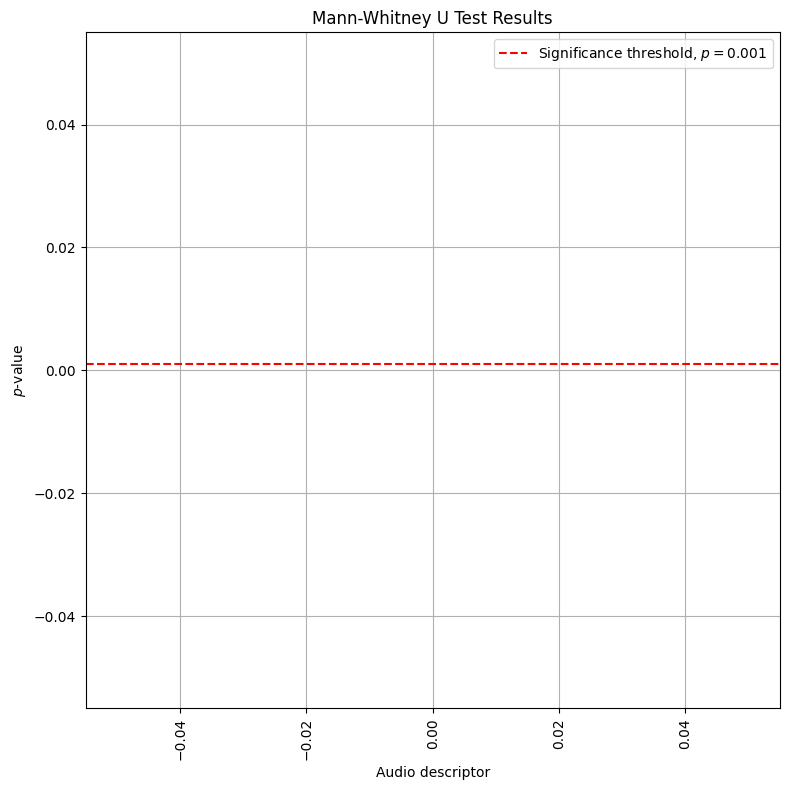

,Variable,p-value,Median (['incorrect']),Median (['correct'])


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Significance level (p-value threshold)
p_threshold = 0.001

# Perform Mann-Whitney U test for each variable
results = []
variable_names = []  # List to store the names of variables (audio descriptors)
for column in X_filtered.columns:
    query_groups = X_filtered.groupby(X['query'])
    groups_data = [group_data[column].values for _, group_data in query_groups]

    # Apply Mann-Whitney U test
    stat, p_value = mannwhitneyu(*groups_data)

    # Compute medians of the two input distributions
    medians = [np.median(group) for group in groups_data]

    if p_value < p_threshold:
        results.append((column, p_value, medians[0], medians[1]))
        if column != 'query':  # Exclude 'query' column
            variable_names.append(column)  # Add variable name


# Sort results by p-value
results.sort(key=lambda x: x[1])

# Create DataFrame from significant results
df_results = pd.DataFrame(results, columns=['Variable', 'p-value', 'Median (' + df['query'].unique()[0] + ')', 'Median (' + df['query'].unique()[1] + ')'])

# Plot p-values with variable names
plt.figure(figsize=(8, 8))  # Adjust figsize for a more squared figure
plt.plot(variable_names, df_results['p-value'], 'o-', color='b')  # Use variable names for x-axis
plt.axhline(y=p_threshold, color='r', linestyle='--', label=f'Significance threshold, $p = {p_threshold}$')
plt.xlabel('Audio descriptor')
plt.ylabel('$\mathit{p}$-value')
plt.title('Mann-Whitney U Test Results')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display significant results
display(df_results)

# Create pair plot for each significant feature
for feature in variable_names:
    sns.pairplot(df[[feature, 'query']], hue='query', palette='viridis')
    #plt.suptitle(f'Pair Plot for {feature}', y=1.02)
    plt.show()



# Feature Importance (Logistic Regression)

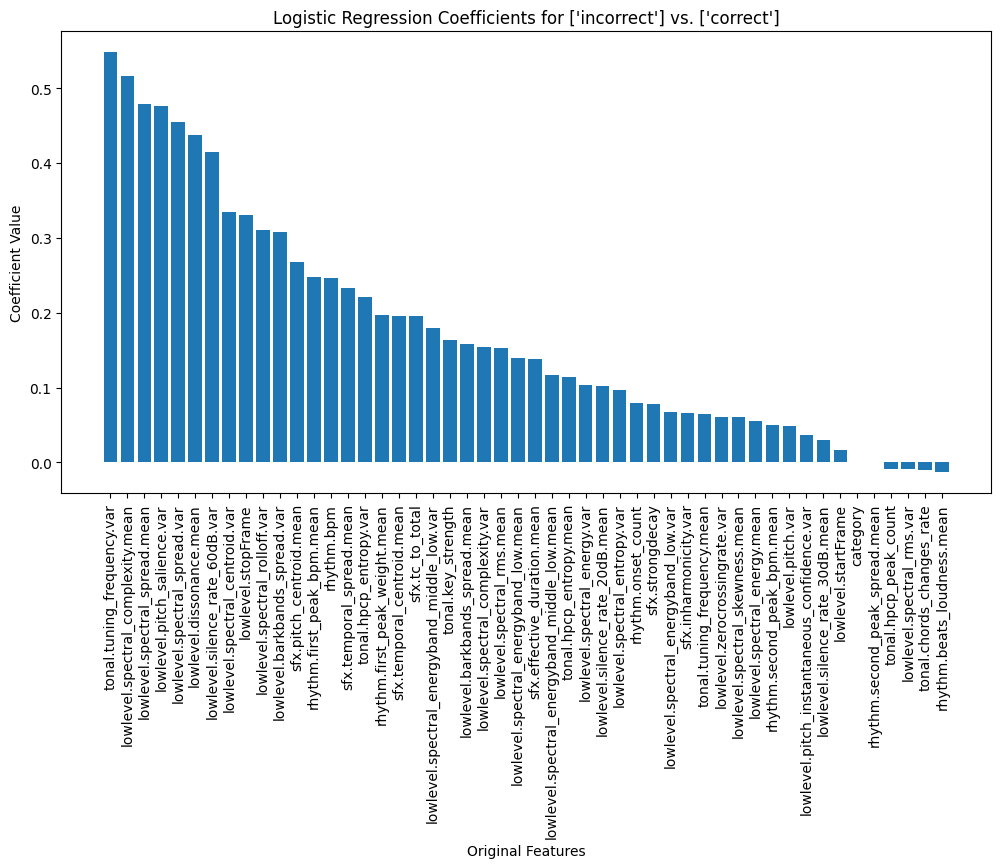

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame with features and 'query' column

# ZJ Drop columns with NaN values
df = df.dropna(axis=1)

# Exclude the 'id' column
df_filtered = df.drop(['id', 'metadata.version.freesound_extractor', 'note'], axis=1)

# Drop columns with NaN values
df_filtered = df_filtered.dropna(axis=1)

# Exclude features with specific elements in their names
exclude_elements = ['min', 'max', 'dvar', 'dmean', 'dvar2', 'dmean2']
filtered_columns = [col for col in df_filtered.columns if not any(element in col for element in exclude_elements)]

# Filter the DataFrame to columns with numeric types only
numeric_columns = df_filtered[filtered_columns].select_dtypes(include='number')

# Include the first column (assuming it's the 'query' column)
X = numeric_columns

# Define labels as the 'query' column
labels = df['query']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Logistic Regression model
model = LogisticRegression(max_iter=7000)
model.fit(X_scaled, labels)

# Retrieve coefficients and feature names
feature_importance = model.coef_[0]
feature_names = X.columns

# Create a DataFrame with feature names and their importance
df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
df_importance_lr = df_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance for the first 50 features
plt.figure(figsize=(12, 6))
plt.bar(df_importance_lr['Feature'][:50], df_importance_lr['Importance'][:50])
plt.title(f"Logistic Regression Coefficients for {df_umap['query'].unique()[0]} vs. {df_umap['query'].unique()[1]}")
plt.xlabel('Original Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.show()


# Feature Importance (Random Forest)


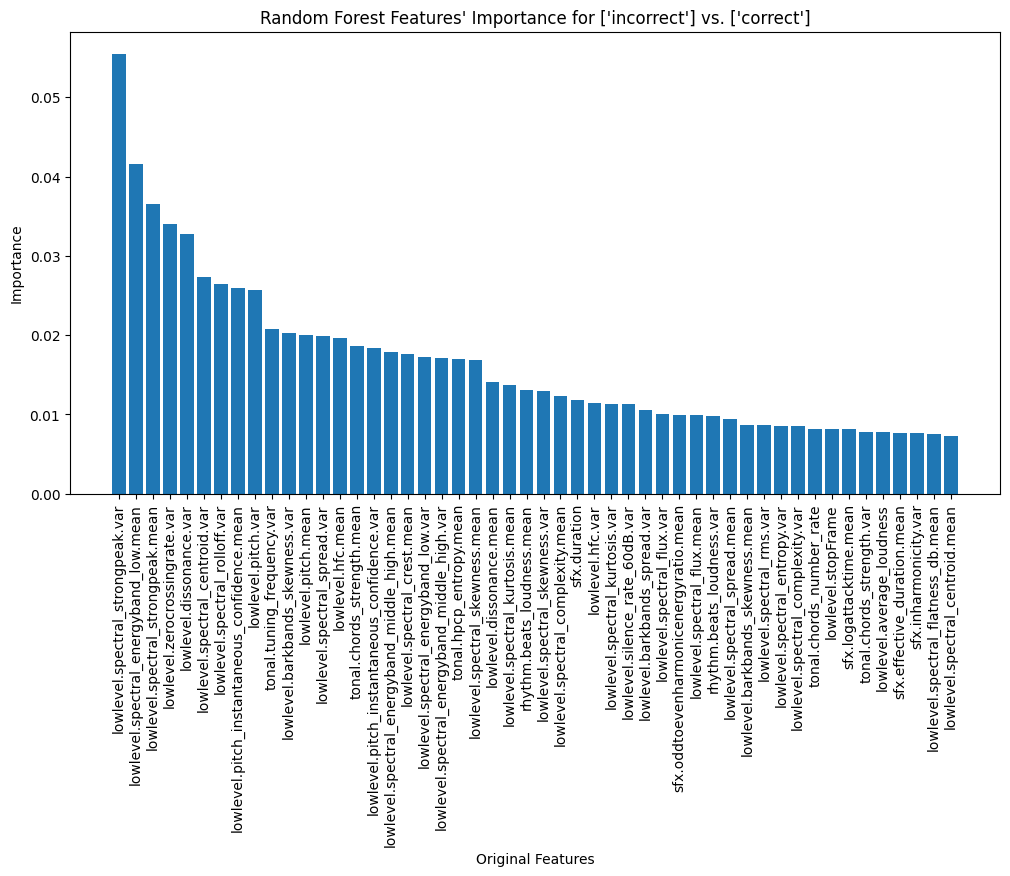

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame with features and 'query' column

# Exclude the 'id' column
df_filtered = df.drop(['id', 'metadata.version.freesound_extractor'], axis=1)

# Exclude features with specific elements in their names
exclude_elements = ['min', 'max', 'dvar', 'dmean', 'dvar2', 'dmean2'] #Meaningless features
filtered_columns = [col for col in df_filtered.columns if not any(element in col for element in exclude_elements)]

# Filter the DataFrame to columns with numeric types only
numeric_columns = df_filtered[filtered_columns].select_dtypes(include='number')

# Include the first column (assuming it's the 'query' column)
X = numeric_columns

# Define labels as the 'query' column
labels = df['query']

# Fit Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, labels)


#########ZJ
###Find nan column
#nan_counts = X.isna().sum()
# Filter columns with NaN values
#nan_columns = nan_counts[nan_counts > 0].index.tolist()
#print("Columns with NaN values:", nan_columns)


# Get feature importances from the trained model
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns



# Create a DataFrame with feature names and their importance
df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
df_importance_rf = df_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance for the first 50 features
plt.figure(figsize=(12, 6))
plt.bar(df_importance_rf['Feature'][:50], df_importance_rf['Importance'][:50])
plt.title(f"Random Forest Features' Importance for {df_umap['query'].unique()[0]} vs. {df_umap['query'].unique()[1]}")
plt.xlabel('Original Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()
